## Principal Component Analysis (PCA)

(PCA) is a foundational technique for dimensionality reduction. It helps reduce the number of features in a dataset while preserving as much variance as possible, making the data more interpretable and often improving the performance of machine learning models.
Why PCA?

High-dimensional data often poses challenges:

    Curse of Dimensionality: Models become more complex and prone to overfitting with an increase in features.
    Collinearity: Redundant features can inflate variance and reduce interpretability.

PCA addresses these issues by transforming the data into a new set of orthogonal features called principal components. These components are ranked by the amount of variance they capture.

---

#### Step 1:
Data Loading and Preprocessing
Import Libraries and Load Data



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the data
data = pd.read_csv('column_2C_weka.csv')

# Separate features and labels
data3 = data.drop('class', axis=1)  # Features
labels = data['class']  # Labels


###### Standardize the Data

Standardizing ensures that all features contribute equally to the PCA, as PCA is sensitive to the scale of the data.

In [2]:
# Standardize the data
scaler = StandardScaler()
data3_scaled = scaler.fit_transform(data3)


#### Step 2: Exploring Principal Components
##### 2.1: Fitting PCA

We start by fitting a PCA model to learn the transformation and inspect the principal components.

In [3]:
# Fit PCA to the data
pca = PCA()
pca.fit(data3_scaled)

# Display principal components
print("Principal Components:\n", pca.components_)


Principal Components:
 [[ 5.35141704e-01  3.23584608e-01  4.57969569e-01  4.45905809e-01
  -1.43496674e-01  4.23977530e-01]
 [-2.19368199e-03  5.27545439e-01  9.28751348e-02 -3.96157338e-01
   7.27755634e-01  1.62776864e-01]
 [ 9.60691033e-02  6.48700760e-01 -1.52338410e-01 -3.60312716e-01
  -5.85990593e-01 -2.71184129e-01]
 [-1.02798971e-01 -6.44118277e-03 -5.48099706e-01 -1.27200929e-01
  -1.74212977e-01  8.01528139e-01]
 [-4.23458331e-01 -1.50562387e-01  6.76770127e-01 -4.31500108e-01
  -2.75763131e-01  2.78852214e-01]
 [ 7.17289820e-01 -4.16492034e-01 -1.45682910e-11 -5.58596187e-01
  -3.44636819e-12  8.30335800e-12]]


##### 2.2: Explained Variance

The explained variance shows how much variance each principal component captures. A scree plot helps visualize the cumulative contribution of the components.

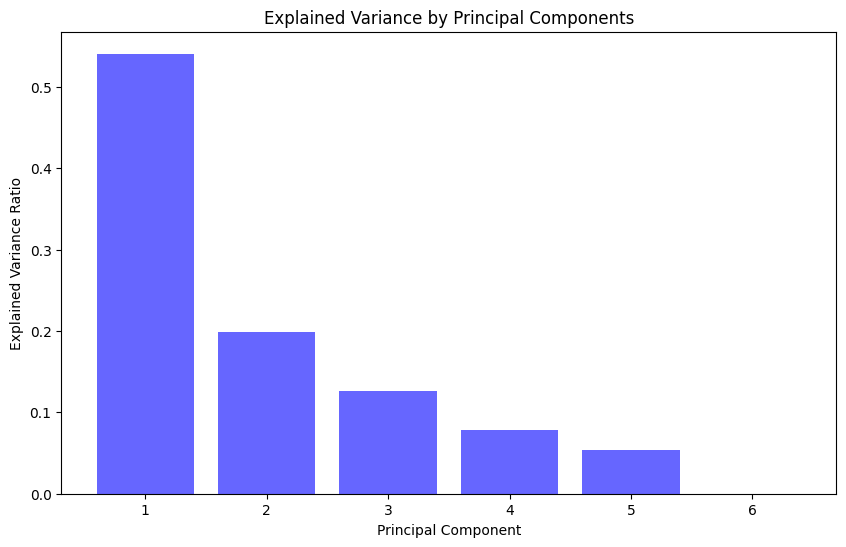

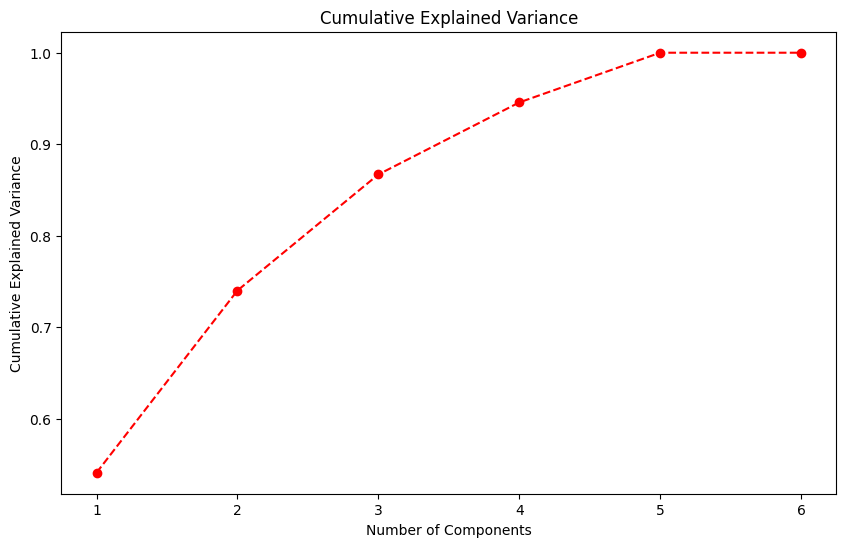

In [4]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.6, color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()


#### Step 3: Choosing the Intrinsic Dimensionality
Intrinsic Dimension

The intrinsic dimension represents the number of components needed to retain most of the dataset's variance. Common thresholds include 95% or 99% cumulative variance.

In [5]:
# Find the number of components explaining 95% variance
threshold = 0.95
n_components = (cumulative_variance >= threshold).argmax() + 1
print(f"Number of components to retain {threshold*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 5


#### Step 4: Dimensionality Reduction with PCA
Transform Data to 2D

Reducing the data to 2 dimensions makes it easier to visualize and interpret patterns, especially for clustering or classification tasks.

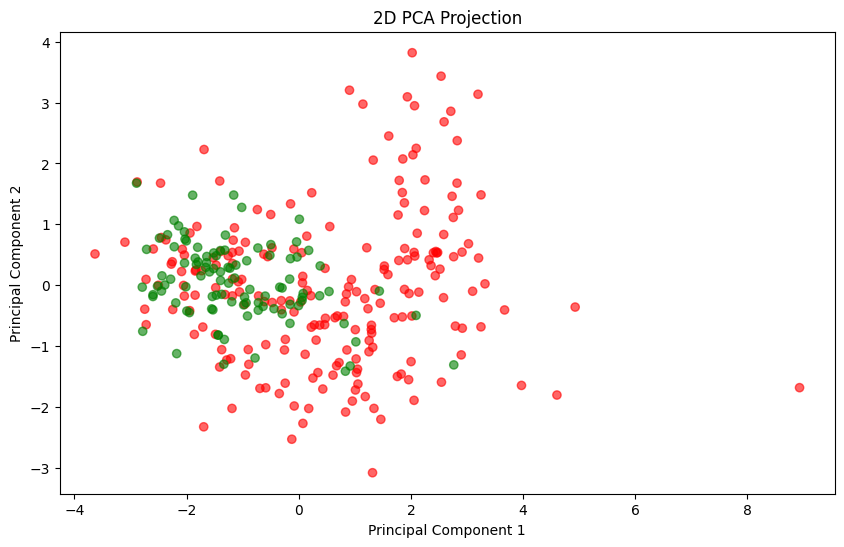

In [7]:
# Reduce data to 2 components
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data3_scaled)

# Visualize the transformed data
color_map = ['red' if label == 'Abnormal' else 'green' for label in labels]

plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=color_map, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


Advanced Visualization: Loadings Plot

A loadings plot shows the influence of original features on the principal components.

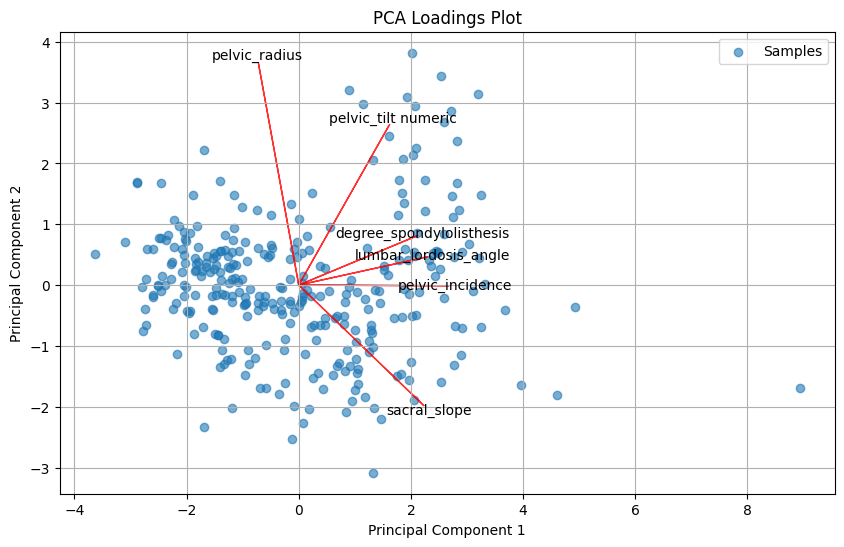

In [8]:
import numpy as np

# Compute loadings
loadings = pca_2d.components_.T

plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6, label='Samples')
for i, feature in enumerate(data3.columns):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5, color='r', alpha=0.8)
    plt.text(loadings[i, 0]*5.2, loadings[i, 1]*5.2, feature, color='black', ha='center', va='center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Loadings Plot')
plt.grid()
plt.legend()
plt.show()


#### Step 5: Reconstruction Error

When reducing dimensions, some information is inevitably lost. The reconstruction error measures this loss.

In [9]:
# Reconstruct the data using the reduced dimensions
reconstructed = pca_2d.inverse_transform(data_2d)

# Compute reconstruction error
reconstruction_error = np.mean((data3_scaled - reconstructed)**2)
print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 0.25993935585244365


#### Step 6: PCA in Machine Learning Pipeline

PCA can also be integrated into machine learning pipelines to improve model performance by reducing noise and collinearity.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data3_scaled, labels, test_size=0.3, random_state=0)

# Create a pipeline with PCA and a classifier
pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=n_components)),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Abnormal       0.86      0.87      0.87        63
      Normal       0.72      0.70      0.71        30

    accuracy                           0.82        93
   macro avg       0.79      0.79      0.79        93
weighted avg       0.82      0.82      0.82        93



#### Step 7: Comparing PCA with Other Techniques

Dimensionality reduction is not limited to PCA. Other techniques include:

    t-SNE: Focuses on visualizing high-dimensional data in 2D or 3D.
    UMAP: Preserves both local and global structures for clustering.

##### Example: t-SNE Visualization

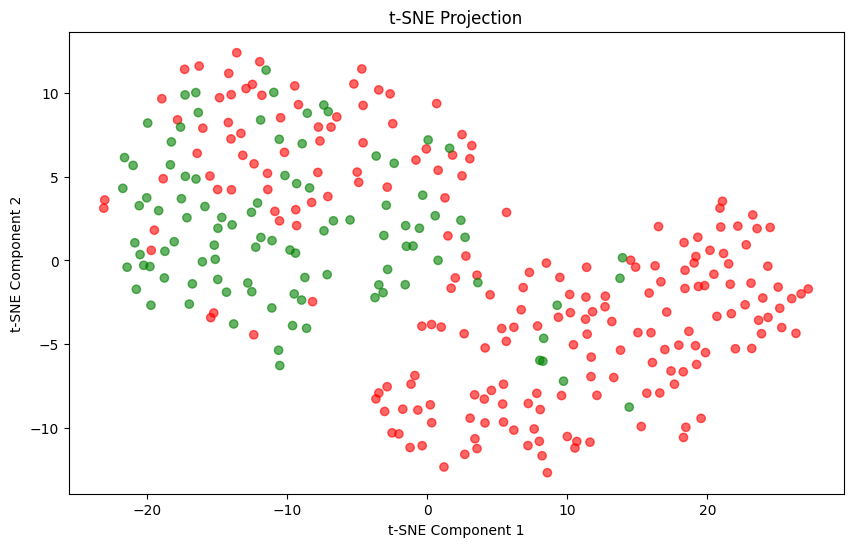

In [12]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data3_scaled)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=color_map, alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection')
plt.show()
